<a href="https://colab.research.google.com/github/rayanhalt/boston-marathon-analysis-2025/blob/main/Boston_25_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🏃‍♀️ Análise Exploratória — Maratona de Boston 2025
##📌 Sobre este projeto

Este notebook é um projeto autoral com foco em aprendizado e prática de Python para análise de dados. A proposta é realizar uma análise exploratória do perfil de corredores que participaram da Maratona de Boston de 2025.

##🎯 Motivação
A Maratona de Boston é uma das seis World Marathon Majors, sendo conhecida por seu alto nível técnico e exigência de tempo mínimo (qualifying time) para participação. Como corredora amadora e aluna do curso de Python da Programaria, essa base de dados me chamou atenção por unir duas paixões: corrida e análise de dados. Decidi então exercitar meus aprendizados explorando o perfil dos atletas dessa edição.

##📁 Fonte de Dados
Os dados utilizados são da tabela Results, disponíveis gratuitamente no Kaggle, no repositório:

🔗 [Boston Marathon Cutoff Prediction Dataset (Kaggle)](:https://www.kaggle.com/datasets/runningwithrock/2026-boston-marathon-cutoff-prediction-dataset)

In [69]:
#1. Conectando o colab ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#importando a biblioteca pandas
import pandas as pd

#definindo caminho do arquivo CSV no drive
caminho_arquivo = '/content/drive/MyDrive/ANALISE_DADOS_AUTORAIS/maratona_de_boston/arquivos_originais_kaggle /Results.csv'

# leitura do arquivo CSV
resultados = pd.read_csv(caminho_arquivo, low_memory=False)

# exibindo as 5 primeiras linhas
resultados.head()

,resultId,athleteId,Year,Race,Name,Country,Zip,City,State,Gender,Age,Age Group,Finish,OverallPlace,GenderPlace
0,1141588,385367,2025,Disney World Marathon,VANILSON NEVES,BRA,NaN,SAO PAULO,NaN,M,36,35-39,8837,1,1
1,1141589,215341,2025,Disney World Marathon,JOHNNY BINZAK,USA,NaN,CHICAGO,IL,M,32,30-34,9120,2,2
2,1141590,258578,2025,Disney World Marathon,THIAGO BIANCHINI,USA,NaN,WOODSTOCK,GA,M,38,35-39,9288,3,3
3,1141591,537977,2025,Disney World Marathon,SEAN CASTER,USA,NaN,SAN MARCOS,CA,M,24,20-24,9675,6,6
4,1141592,218100,2025,Disney World Marathon,TRENT HUDAK,USA,NaN,CHANNAHON,IL,M,23,20-24,9884,9,9


In [71]:
# Filtrando apenas os registros da edição de 2025
df_2025 = resultados[resultados['Year'] == 2025]

# Conferindo as primeiras linhas da filtragem
df_2025.head()


,resultId,athleteId,Year,Race,Name,Country,Zip,City,State,Gender,Age,Age Group,Finish,OverallPlace,GenderPlace
0,1141588,385367,2025,Disney World Marathon,VANILSON NEVES,BRA,NaN,SAO PAULO,NaN,M,36,35-39,8837,1,1
1,1141589,215341,2025,Disney World Marathon,JOHNNY BINZAK,USA,NaN,CHICAGO,IL,M,32,30-34,9120,2,2
2,1141590,258578,2025,Disney World Marathon,THIAGO BIANCHINI,USA,NaN,WOODSTOCK,GA,M,38,35-39,9288,3,3
3,1141591,537977,2025,Disney World Marathon,SEAN CASTER,USA,NaN,SAN MARCOS,CA,M,24,20-24,9675,6,6
4,1141592,218100,2025,Disney World Marathon,TRENT HUDAK,USA,NaN,CHANNAHON,IL,M,23,20-24,9884,9,9


In [72]:
# verificando quantas ocorrências da Maratona de Boston existem na coluna 'Race'
# usando .str.contains para identificar registros que contenham a palavra 'Boston' (sem considerar maiúsculas/minúsculas)

total_ocorrencias_boston = resultados[resultados['Race'].str.contains('Boston', case=False, na=False)].shape[0]

# exibindo o total encontrado com formatação de milhar
print(f'Total de ocorrências contendo "Boston" na coluna Race: {total_ocorrencias_boston:,}')


Total de ocorrências contendo "Boston" na coluna Race: 53,914


In [73]:
# criando um novo DataFrame apenas com os registros da Maratona de Boston
results_boston = resultados[resultados['Race'].str.contains('Boston', case=False, na=False)]

# exibindo as primeiras linhas para conferência
results_boston.head()


,resultId,athleteId,Year,Race,Name,Country,Zip,City,State,Gender,Age,Age Group,Finish,OverallPlace,GenderPlace
99539,1369875,372307,2025,Boston Marathon,Sharon Lokedi,USA,NaN,Flagstaff,AZ,F,31,30-34,8242,35,1
99540,1369876,372308,2025,Boston Marathon,Hellen Obiri,KEN,NaN,NaN,NaN,F,35,35-39,8261,38,2
99541,1369877,372309,2025,Boston Marathon,Yalemzerf Yehualaw,ETH,NaN,NaN,NaN,F,25,25-29,8286,39,3
99542,1369878,372310,2025,Boston Marathon,Irine Cheptai,KEN,NaN,NaN,NaN,F,33,30-34,8492,57,4
99543,1369879,372311,2025,Boston Marathon,Amane Beriso,ETH,NaN,Addis Ababa,NaN,F,33,30-34,8518,60,5


###*A partir deste ponto, todas as análises serão feitas com base no DataFrame results_boston, que contém exclusivamente registros da Maratona de Boston*

In [74]:
# filtrar os registros da maratona de boston apenas para o ano de 2025
results_2025 = results_boston[results_boston['Year'] == 2025]

# exibir as primeiras linhas para verificar se o filtro funcionou corretamente
results_2025.head()


,resultId,athleteId,Year,Race,Name,Country,Zip,City,State,Gender,Age,Age Group,Finish,OverallPlace,GenderPlace
99539,1369875,372307,2025,Boston Marathon,Sharon Lokedi,USA,NaN,Flagstaff,AZ,F,31,30-34,8242,35,1
99540,1369876,372308,2025,Boston Marathon,Hellen Obiri,KEN,NaN,NaN,NaN,F,35,35-39,8261,38,2
99541,1369877,372309,2025,Boston Marathon,Yalemzerf Yehualaw,ETH,NaN,NaN,NaN,F,25,25-29,8286,39,3
99542,1369878,372310,2025,Boston Marathon,Irine Cheptai,KEN,NaN,NaN,NaN,F,33,30-34,8492,57,4
99543,1369879,372311,2025,Boston Marathon,Amane Beriso,ETH,NaN,Addis Ababa,NaN,F,33,30-34,8518,60,5


In [75]:
##salvar em um novo arquivo CSV
##results_2025.to_csv("boston_races_2025.csv", index=False)

In [76]:
# contar ocorrências de cada valor único na coluna Year
contagem_por_ano = results_boston['Year'].value_counts()

# exibir os resultados
print(contagem_por_ano)

Year
2025    28384
2024    25530
Name: count, dtype: int64


 ### A base contém dados das edições de 2024 e 2025. como o foco deste projeto é a maratona de 2025, as análises seguirão com base apenas nesse recorte.

##📂 criando o dataframe final com os dados da maratona de boston de 2025
aqui crio um novo dataframe com todos os registros da maratona de boston do ano de 2025. essa será a base final para as análises exploratórias deste projeto.

In [77]:
# Criar um novo DataFrame com apenas registros do ano 2025
boston_results_2025 = results_boston[results_boston['Year'] == 2025]

# Exibir as primeiras linhas para conferir
print(boston_results_2025.head())

# Opcional: salvar em um arquivo CSV
boston_results_2025.to_csv("boston_races_2025.csv", index=False)

       resultId  athleteId  Year             Race                Name Country  \
99539   1369875     372307  2025  Boston Marathon       Sharon Lokedi     USA   
99540   1369876     372308  2025  Boston Marathon        Hellen Obiri     KEN   
99541   1369877     372309  2025  Boston Marathon  Yalemzerf Yehualaw     ETH   
99542   1369878     372310  2025  Boston Marathon       Irine Cheptai     KEN   
99543   1369879     372311  2025  Boston Marathon        Amane Beriso     ETH   

       Zip         City State Gender  Age Age Group  Finish  OverallPlace  \
99539  NaN    Flagstaff    AZ      F   31     30-34    8242            35   
99540  NaN          NaN   NaN      F   35     35-39    8261            38   
99541  NaN          NaN   NaN      F   25     25-29    8286            39   
99542  NaN          NaN   NaN      F   33     30-34    8492            57   
99543  NaN  Addis Ababa   NaN      F   33     30-34    8518            60   

       GenderPlace  
99539            1  
99540   

In [78]:
# montar o drive para acessar a pasta pessoal no google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# definir o caminho onde o arquivo será salvo dentro do meu drive
caminho_drive = "/content/drive/My Drive/boston_races_2025.csv"

#salvar o dataframe no drive como arquivo csv
boston_results_2025.to_csv(caminho_drive, index=False)

#exibindo o caminho salvo
print(f"Arquivo salvo em: {caminho_drive}")

Arquivo salvo em: /content/drive/My Drive/boston_races_2025.csv


In [80]:
# exibir informações gerais do DataFrame
boston_results_2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28384 entries, 99539 to 127922
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   resultId      28384 non-null  int64 
 1   athleteId     28384 non-null  int64 
 2   Year          28384 non-null  int64 
 3   Race          28384 non-null  object
 4   Name          28384 non-null  object
 5   Country       28384 non-null  object
 6   Zip           0 non-null      object
 7   City          28355 non-null  object
 8   State         20589 non-null  object
 9   Gender        28384 non-null  object
 10  Age           28384 non-null  int64 
 11  Age Group     28384 non-null  object
 12  Finish        28384 non-null  int64 
 13  OverallPlace  28384 non-null  int64 
 14  GenderPlace   28384 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.5+ MB


In [81]:
# remover a coluna ZIP (vazia) do dataFrame
boston_results_2025 = boston_results_2025.drop(columns=['Zip'])



In [82]:

print("Coluna Zip removida!")

Coluna Zip removida!


In [83]:
# vou usar apenas país nessa análise então posso descartar cidade e estado nessa análise
boston_results_2025 = boston_results_2025.drop(columns=['City', 'State'])


###⏱️ conversão do tempo de chegada para formato legível
a coluna finish contém o tempo de chegada em segundos, que é ótimo para cálculos, mas pouco intuitivo para leitura. por isso, criei uma nova coluna finish_time que converte esses segundos para o formato horas:minutos:segundos usando o tipo timedelta.

dessa forma, preservo os dados originais para análise estatística e deixo o tempo fácil de interpretar visualmente.



In [84]:
# criar coluna finish_time convertendo segundos para formato hh:mm:ss
boston_results_2025['finish_time'] = pd.to_timedelta(boston_results_2025['Finish'], unit='s')

# conferir as primeiras linhas para validar a criação da nova coluna
boston_results_2025[['Finish', 'finish_time']].head()


,Finish,finish_time
99539,8242,0 days 02:17:22
99540,8261,0 days 02:17:41
99541,8286,0 days 02:18:06
99542,8492,0 days 02:21:32
99543,8518,0 days 02:21:58


###💾 salvar o arquivo no google drive e copiar para o ambiente local do colab
como estou trabalhando no google colab, salvo o arquivo atualizado com os dados da maratona de boston de 2025 no meu google drive para garantir que ele fique armazenado permanentemente, mesmo após o encerramento da sessão.

para isso, monto o google drive no colab, salvo o arquivo na pasta desejada do drive e depois copio esse arquivo para o ambiente local do colab (/content/), facilitando o acesso rápido e uso em outras células.



In [85]:
from google.colab import drive
drive.mount('/content/drive')

caminho_drive = "/content/drive/My Drive/boston_results_2025.csv"
boston_results_2025.to_csv(caminho_drive, index=False)

print(f"arquivo salvo em: {caminho_drive}")

# copiar o arquivo salvo no drive para a raiz do colab para facilitar manipulação local
!cp "/content/drive/My Drive/boston_results_2025.csv" .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
arquivo salvo em: /content/drive/My Drive/boston_results_2025.csv


# Quem correu boston 2025?

* Quais faixas etárias têm mais corredores?

*   Como essa participação se distribui entre homens e mulheres dentro de cada grupo?

##📝 análise: quem são os corredores da maratona de boston 2025?
**as majors não são para iniciantes!** justamente por exigir tempo de qualificação, a maratona de boston reúne atletas experientes — e os dados reforçam isso.

a faixa etária com maior número de participantes em 2025 foi 45–49 anos, com 4.201 corredores. em seguida, aparecem 40–44 anos (3.976 atletas) e 35–39 anos (3.514 atletas).
essas três faixas concentram mais de 30% do total de participantes, **o que reforça a ideia de que o auge do maratonista amador — em termos de volume — está entre os 35 e 49 anos.
essa concentração está alinhada com o fato de que muitos atletas atingem seu melhor desempenho com mais tempo de treino, experiência e maturidade física.**

>OBS:artigos científicos também apontam que corredores mais experientes se lesionam menos, justamente por estarem mais adaptados fisiologicamente à corrida


**Ao observarmos a distribuição por gênero, notamos que a participação feminina é mais expressiva nas faixas etárias entre 20 e 34 anos, com destaque para o grupo 25–29 anos, onde as mulheres são maioria (55,4%).**

com o avanço da idade, esse cenário se inverte: os homens tornam-se maioria em praticamente todas as faixas a partir dos 35 anos, chegando a representar mais de 70% dos corredores nas faixas acima dos 65 anos.

essa diferença pode estar relacionada a múltiplos fatores — desde a continuidade no esporte ao longo da vida até questões sociais e históricas. vale a reflexão:

>*💭 será que estamos observando uma mudança geracional, em que mulheres na faixa dos 30 anos vêm aderindo mais fortemente à prática esportiva de endurance do que nas gerações anteriores?*
>é uma hipótese interessante, e os dados parecem sinalizar esse movimento.

o gráfico a seguir nos ajuda a visualizar essas proporções com mais clareza.

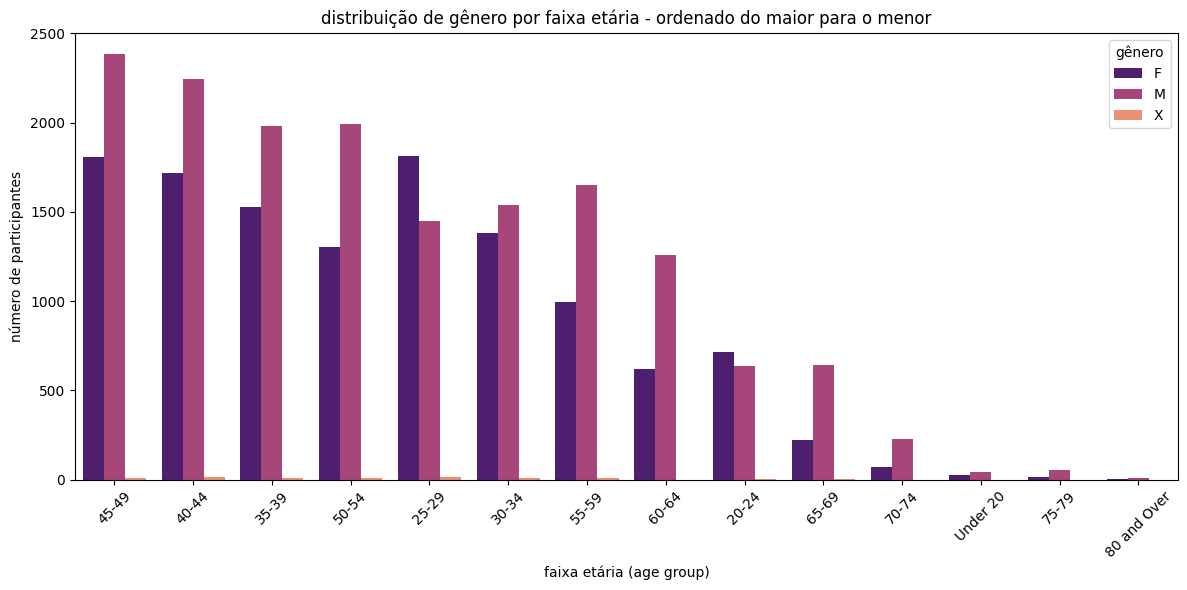

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# contar o número de participantes por faixa etária e gênero
contagem_genero_age = boston_results_2025.groupby(['Age Group', 'Gender']).size().reset_index(name='count')

# ordenar decrescente por count para definir a ordem das faixas etárias
ordem_faixas = contagem_genero_age.groupby('Age Group')['count'].sum().sort_values(ascending=False).index.tolist()

# criar gráfico de barras com paleta magma e ordem decrescente
plt.figure(figsize=(12, 6))
sns.barplot(data=contagem_genero_age, x='Age Group', y='count', hue='Gender', order=ordem_faixas, palette='magma')

# melhorar visualização
plt.xticks(rotation=45)
plt.xlabel("faixa etária (age group)")
plt.ylabel("número de participantes")
plt.title("distribuição de gênero por faixa etária - ordenado do maior para o menor")
plt.legend(title="gênero")
plt.tight_layout()
plt.show()





In [87]:
# criar tabela com total de participantes por faixa etária e gênero
tabela_participantes_faixa_genero = (
    boston_results_2025
    .groupby(['Age Group', 'Gender'])
    .size()
    .unstack(fill_value=0)
)

# calcular total por faixa e percentual relativo
tabela_participantes_faixa_genero['total'] = tabela_participantes_faixa_genero.sum(axis=1)
tabela_participantes_faixa_genero['percentual_m'] = (tabela_participantes_faixa_genero['M'] / tabela_participantes_faixa_genero['total'] * 100).round(1)
tabela_participantes_faixa_genero['percentual_f'] = (tabela_participantes_faixa_genero['F'] / tabela_participantes_faixa_genero['total'] * 100).round(1)

# ordenar do maior para o menor total
tabela_participantes_faixa_genero = tabela_participantes_faixa_genero.sort_values(by='total', ascending=False)

# exibir tabela
tabela_participantes_faixa_genero


Gender,F,M,X,total,percentual_m,percentual_f
Age Group,,,,,,
45-49,1807,2384,10,4201,56.7,43.0
40-44,1716,2247,13,3976,56.5,43.2
35-39,1527,1980,7,3514,56.3,43.5
50-54,1304,1994,7,3305,60.3,39.5
25-29,1814,1447,14,3275,44.2,55.4
30-34,1383,1539,11,2933,52.5,47.2
55-59,993,1649,6,2648,62.3,37.5
60-64,621,1258,0,1879,67.0,33.0
20-24,712,638,2,1352,47.2,52.7


##De onde vêm os corredores da maratona de boston 2025?

para entender a dimensão internacional da prova, verifiquei os países com maior número de participantes em 2025. esse dado mostra não só a origem dos atletas, mas também ajuda a visualizar o *alcance global da maratona.*



In [88]:
# Contagem de ocorrências por país
top_paises = boston_results_2025['Country'].value_counts().head(5)

# Exibir os top 5 países
print(top_paises)

Country
USA    19041
CAN     1535
GBR     1230
MEX      630
BRA      516
Name: count, dtype: int64


##🌎 análise:
como esperado, os estados unidos lideram com ampla margem, reunindo mais de 66% dos corredores dessa edição.
na sequência, destacam-se canadá, reino unido, méxico e o brasil, com 516 corredores — um número expressivo para um país fora do eixo tradicional das majors.

isso mostra o quanto a maratona de boston atrai corredores do mundo inteiro e reforça o prestígio do evento, especialmente para atletas amadores que encaram o desafio como uma meta de vida.

/tmp/ipython-input-89-3448140386.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_paises, y='Country', x='Count', palette='magma')


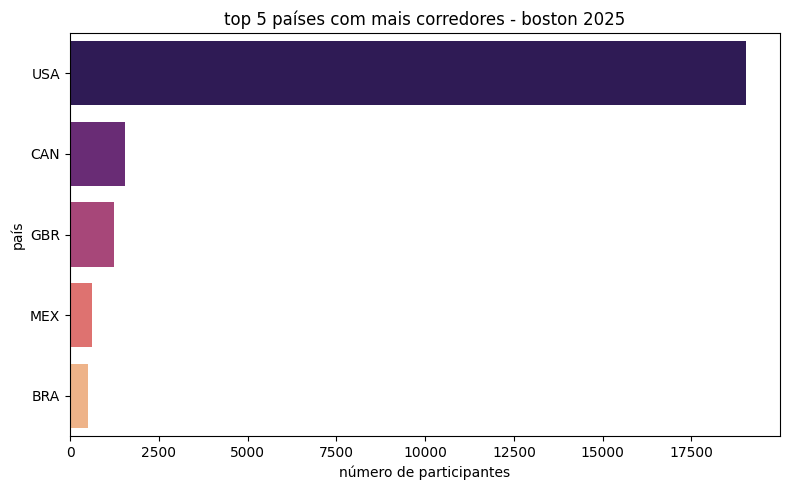

In [89]:
# transformar série em dataframe para visualização
df_top_paises = top_paises.reset_index()
df_top_paises.columns = ['Country', 'Count']

# gráfico de barras horizontal com tema magma
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=df_top_paises, y='Country', x='Count', palette='magma')

plt.title("top 5 países com mais corredores - boston 2025")
plt.xlabel("número de participantes")
plt.ylabel("país")
plt.tight_layout()
plt.show()


##Como os tempos de prova variam por faixa etária e gênero?



#### análise descritiva de performance por faixa etária e gênero

O gráfico e a tabela apresentam os principais indicadores estatísticos dos tempos de prova, agrupados por faixa etária e gênero.

podemos observar que:

- os jovens entre 20-29 anos foram mais rápidos, com a mediana e média de tempo abaixo de 3h45min ;

- o desempenho tende a desacelerar progressivamente com a idade, principalmente após os 45 anos;

- **as mulheres têm tempos medianos maiores que os homens em todas as faixas etárias. mas essa diferença é menor nas faixas mais jovens. Possivelmente refletindo uma maior competitividade e preparação das mulheres mais jovens;**

- apesar da tendência geral, há bastante variabilidade individual nos tempos, mostrando perfis diversificados de corredores em cada grupo!

essa análise é importante para patrocinadores e organizadores que desejam entender o perfil dos participantes e direcionar ações específicas para cada segmento.


/tmp/ipython-input-90-1348415701.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([pd.to_datetime(seg, unit='s').strftime('%H:%M:%S') for seg in ax.get_yticks()])


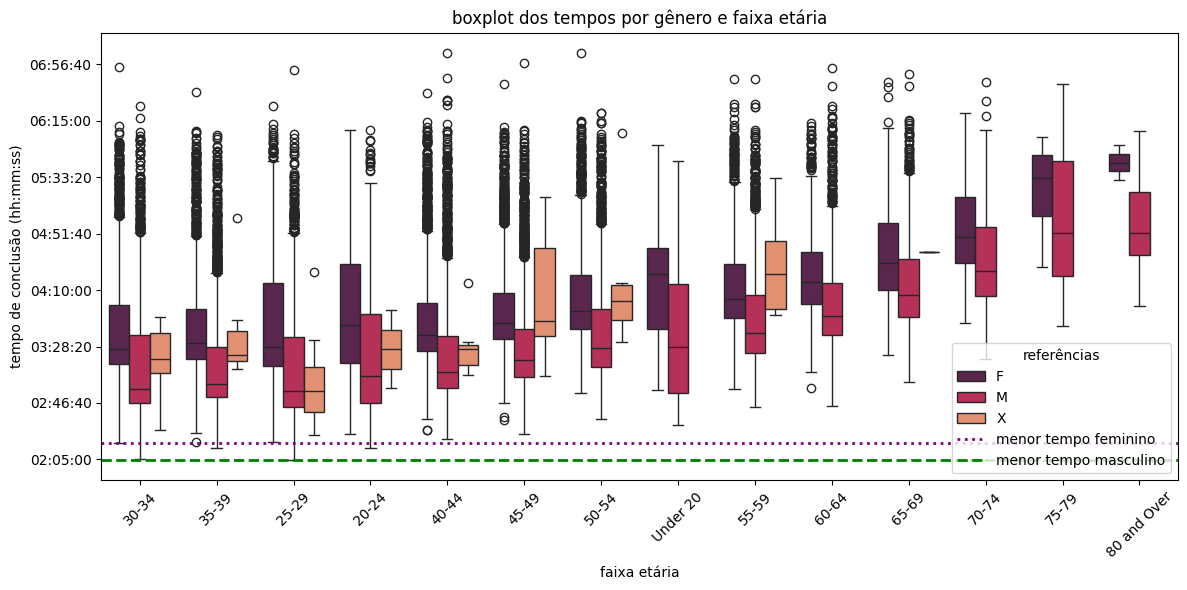

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# identificar os menores tempos feminino e masculino (em segundos)
menor_tempo_feminino = boston_results_2025[boston_results_2025['Gender'] == 'F']['Finish'].min()
menor_tempo_masculino = boston_results_2025[boston_results_2025['Gender'] == 'M']['Finish'].min()

# criar o boxplot dos tempos por faixa etária e gênero
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=boston_results_2025,
    x="Age Group",
    y="Finish",
    hue="Gender",
    palette="rocket"
)

# adicionar linhas de referência com os menores tempos
plt.axhline(menor_tempo_feminino, color='purple', linestyle='dotted', linewidth=2, label="menor tempo feminino")
plt.axhline(menor_tempo_masculino, color='green', linestyle='dashed', linewidth=2, label="menor tempo masculino")

# converter o eixo y de segundos para formato HH:MM:SS
ax.set_yticklabels([pd.to_datetime(seg, unit='s').strftime('%H:%M:%S') for seg in ax.get_yticks()])

# ajustes visuais
plt.xlabel("faixa etária")
plt.ylabel("tempo de conclusão (hh:mm:ss)")
plt.title("boxplot dos tempos por gênero e faixa etária")
plt.legend(title="referências")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [91]:
# calcular estatísticas descritivas por faixa etária e gênero
tabela_tempo_estatisticas = (
    boston_results_2025
    .groupby(['Age Group', 'Gender'])['Finish']
    .agg([
        ('mediana_segundos', 'median'),
        ('media_segundos', 'mean'),
        ('desvio_padrao', 'std'),
        ('quantidade', 'count')
    ])
    .reset_index()
)

# converter segundos para formato hh:mm:ss
tabela_tempo_estatisticas['mediana_hms'] = tabela_tempo_estatisticas['mediana_segundos'].apply(lambda x: pd.to_timedelta(x, unit='s'))
tabela_tempo_estatisticas['media_hms'] = tabela_tempo_estatisticas['media_segundos'].apply(lambda x: pd.to_timedelta(x, unit='s'))

# reorganizar colunas para facilitar a leitura
tabela_tempo_estatisticas = tabela_tempo_estatisticas[
    ['Age Group', 'Gender', 'quantidade',
     'mediana_segundos', 'mediana_hms',
     'media_segundos', 'media_hms',
     'desvio_padrao']
]

# exibir a tabela final
tabela_tempo_estatisticas.head()


,Age Group,Gender,quantidade,mediana_segundos,mediana_hms,media_segundos,media_hms,desvio_padrao
0,20-24,F,712,13438.5,0 days 03:43:58.500000,14163.869382,0 days 03:56:03.869382022,2846.088380
1,20-24,M,638,11200.0,0 days 03:06:40,12215.340125,0 days 03:23:35.340125392,2899.417122
2,20-24,X,2,12371.0,0 days 03:26:11,12371.000000,0 days 03:26:11,2445.175249
3,25-29,F,1814,12494.0,0 days 03:28:14,13594.050165,0 days 03:46:34.050165380,2735.420294
4,25-29,M,1447,10526.0,0 days 02:55:26,11657.512094,0 days 03:14:17.512093988,2790.564759


### Quem são os vencedores de cada gênero e quão rápidos el@s correram?

In [92]:
# calcular pace em min/km com 2 casas decimais
boston_results_2025['pace_min_km'] = (boston_results_2025['Finish'] / (42 * 60)).round(2)

# calcular velocidade média em km/h com 2 casas decimais
boston_results_2025['velocidade_kmh'] = (42 * 3600 / boston_results_2025['Finish']).round(2)

# top 5 mais rápidos feminino
top5_feminino = (
    boston_results_2025[boston_results_2025['Gender'] == 'F']
    .nsmallest(5, 'Finish')
    [['Name', 'Age', 'Country', 'Finish', 'finish_time', 'pace_min_km', 'velocidade_kmh']]
    .reset_index(drop=True)
)

# top 5 mais rápidos masculino
top5_masculino = (
    boston_results_2025[boston_results_2025['Gender'] == 'M']
    .nsmallest(5, 'Finish')
    [['Name', 'Age', 'Country', 'Finish', 'finish_time', 'pace_min_km', 'velocidade_kmh']]
    .reset_index(drop=True)
)

from IPython.display import display

print("top 5 mais rápidos - feminino")
display(top5_feminino)

print("\ntop 5 mais rápidos - masculino")
display(top5_masculino)


top 5 mais rápidos - feminino


,Name,Age,Country,Finish,finish_time,pace_min_km,velocidade_kmh
0,Sharon Lokedi,31,USA,8242,0 days 02:17:22,3.27,18.35
1,Hellen Obiri,35,KEN,8261,0 days 02:17:41,3.28,18.30
2,Yalemzerf Yehualaw,25,ETH,8286,0 days 02:18:06,3.29,18.25
3,Irine Cheptai,33,KEN,8492,0 days 02:21:32,3.37,17.80
4,Amane Beriso,33,ETH,8518,0 days 02:21:58,3.38,17.75



top 5 mais rápidos - masculino


,Name,Age,Country,Finish,finish_time,pace_min_km,velocidade_kmh
0,John Korir,28,KEN,7485,0 days 02:04:45,2.97,20.20
1,Alphonce Felix Simbu,33,TAN,7504,0 days 02:05:04,2.98,20.15
2,Cybrian Kotut,32,KEN,7504,0 days 02:05:04,2.98,20.15
3,Conner Mantz,28,USA,7508,0 days 02:05:08,2.98,20.14
4,Muktar Edris,31,ETH,7559,0 days 02:05:59,3.00,20.00


###Estamos falando da elite!!!

##Feminina!
os tempos das 5 primeiras mulheres colocadas, variam entre 2h17min22s e 2h21min58s, com pace médio entre 3,27 e 3,38 min/km — muito rápido para maratona feminina.

>*sim, aqui segundos realmente fazem diferença, e nesse nível "competitivo de altíssima performance" os tênis de placa realmente podem fazer diferença no resultado.*

a velocidade média fica entre 17 e 18 km/h, o que demonstra altíssimo nível competitivo. (isso é muito rápido!)

- pra vocês terem uma "noção" os tempos médios de maratona para corredoras amadoras (não treinadas para performance (da mesma faixa etária) giram em torno de 5h a 5h30 (velocidade de 7,6 a 8,4 km/h.)

- estas corredoras vêm principalmente de países com tradição em corrida de longa distância,como Quênia, Etiópia e nesse caso EUA.

as idades variam de 25 a 35 anos, faixa típica do auge da performance em maratonas.


## Masculina

- O desempenho masculino é ainda mais rápido! Com tempos na faixa de 2h04min45s a 2h05min59s.

- com idade, também, entre 28 e 33 anos, que nessa análise foi o auge da capacidade física para os maratonistas.

>*Isso reflete um pace médio entre 2,97 e 3,00 min/km (velocidade média de ~20km/h, muito próxima ao recorde mundial)— isso é **muito** elite.*
a título de comparação, os tempos médios de maratona para corredores amadores (homens adultos na faixa 25-45 anos) giram em torno de 4h30 a 5h (8,4 a 9,3 km/h.)

atletas vêm principalmente da África Oriental (Quênia, Tanzânia, Etiópia) e EUA, que é sede da prova.

idade também centrada entre 28 e 33 anos, o auge da capacidade física para maratonas.

**Como os tempos de conclusão da maratona se distribuem para cada gênero e faixa etária? Podemos visualizar isso com violin plots para identificar padrões e possíveis outliers?**

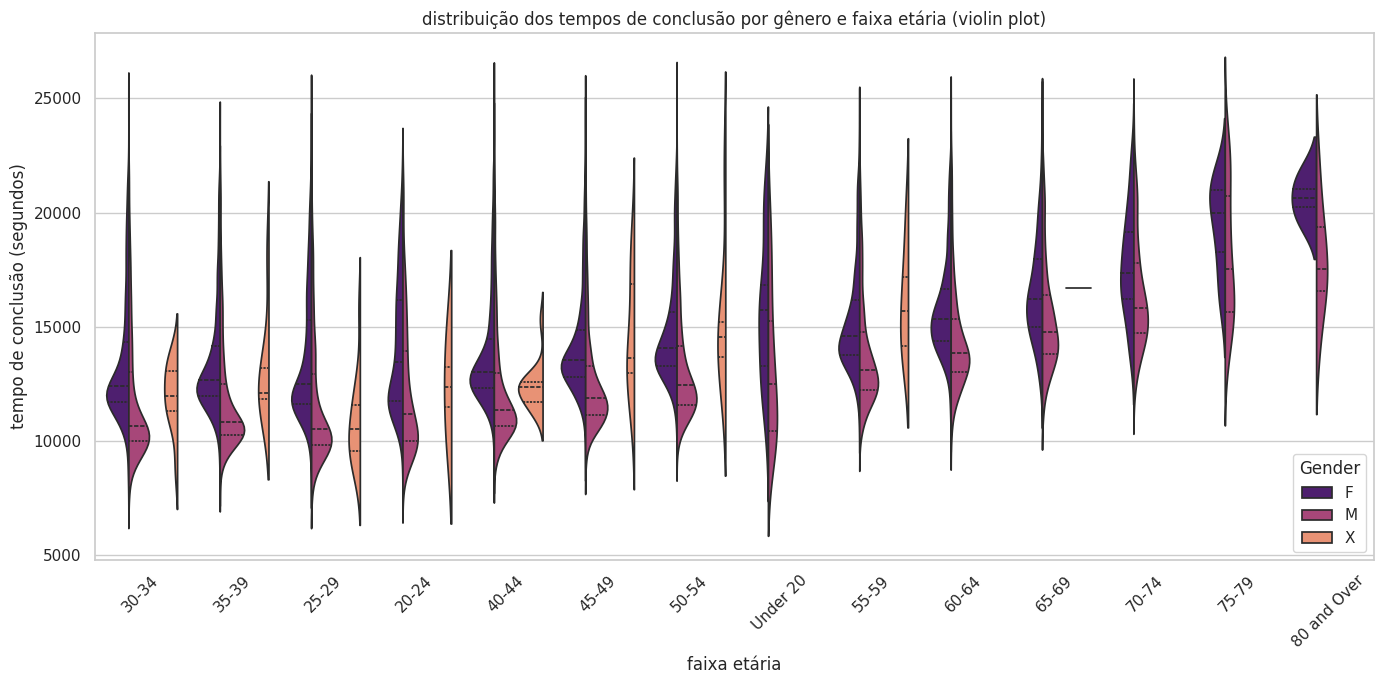

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# configurar estilo do seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))

# criar violin plot de tempos por faixa etária e gênero
sns.violinplot(
    data=boston_results_2025,
    x="Age Group",
    y="Finish",
    hue="Gender",
    split=True,          # para sobrepor as distribuições de gênero lado a lado na mesma faixa etária
    inner="quartile",    # mostra linhas de quartis dentro do violino
    palette="magma"
)

plt.title("distribuição dos tempos de conclusão por gênero e faixa etária (violin plot)")
plt.xlabel("faixa etária")
plt.ylabel("tempo de conclusão (segundos)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



o violin plot mostra a distribuição dos tempos e sua densidade, com quartis internos, permitindo comparar a forma da distribuição entre gêneros dentro de cada faixa etária.

o kde plot apresenta a densidade estimada dos tempos, comparando diretamente os gêneros em uma mesma curva.

o boxplot destaca a mediana, quartis e possíveis outliers, auxiliando na visualização dos extremos de tempo e variabilidade entre grupos.

## Como se comporta o ritmo médio de prova de acordo com os gêneros e faixas etárias?

Ao analisar o pace médio por faixa etária e gênero, observamos que os homens jovens-adultos e de meia-idade apresentam os melhores tempos médios na maratona, com paces entre 4,6 e 5 minutos por quilômetro.
Já as mulheres nas mesmas faixas apresentam paces ligeiramente mais altos, entre 5,3 e 5,6 min/km, resultado esperado pela fisiologia esportiva.
O ritmo médio aumenta conforme a idade avança, confirmando a influência do envelhecimento na performance.
A maior concentração de participantes está entre 25 e 49 anos, tanto para homens quanto para mulheres, refletindo o perfil típico dos corredores de maratona.
As categorias com poucos participantes foram desconsideradas para análises quantitativas.

In [100]:
# calcular média do pace (em min/km) por faixa etária e gênero
pace_medio = boston_results_2025.groupby(['Age Group', 'Gender'])['pace_min_km'].mean().reset_index(name='avg_pace')

# contar total de participantes para calcular percentual
total_participantes = boston_results_2025.shape[0]

# calcular contagem por faixa etária e gênero
contagem = boston_results_2025.groupby(['Age Group', 'Gender']).size().reset_index(name='count')

# unir média do pace com a contagem
tabela_pace = pace_medio.merge(contagem, on=['Age Group', 'Gender'])

# calcular percentual amostral em relação ao total
tabela_pace['percentual'] = (tabela_pace['count'] / total_participantes) * 100

# organizar colunas
tabela_pace = tabela_pace[['Age Group', 'Gender', 'avg_pace', 'count', 'percentual']]

# ordenar por percentual decrescente para facilitar leitura
tabela_pace = tabela_pace.sort_values(by='percentual', ascending=False).reset_index(drop=True)

# exibir tabela final
print(tabela_pace)


      Age Group Gender  avg_pace  count  percentual
0         45-49      M  4.995885   2384    8.399098
1         40-44      M  4.854321   2247    7.916432
2         50-54      M  5.235858   1994    7.025085
3         35-39      M  4.687990   1980    6.975761
4         25-29      F  5.394438   1814    6.390924
5         45-49      F  5.622020   1807    6.366263
6         40-44      F  5.475536   1716    6.045660
7         55-59      M  5.495925   1649    5.809611
8         30-34      M  4.692112   1539    5.422069
9         35-39      F  5.325907   1527    5.379791
10        25-29      M  4.626019   1447    5.097943
11        30-34      F  5.319335   1383    4.872463
12        50-54      F  5.869893   1304    4.594138
13        60-64      M  5.734793   1258    4.432074
14        55-59      F  6.058671    993    3.498450
15        20-24      F  5.620520    712    2.508455
16        65-69      M  6.113005    639    2.251268
17        20-24      M  4.847335    638    2.247745
18        60

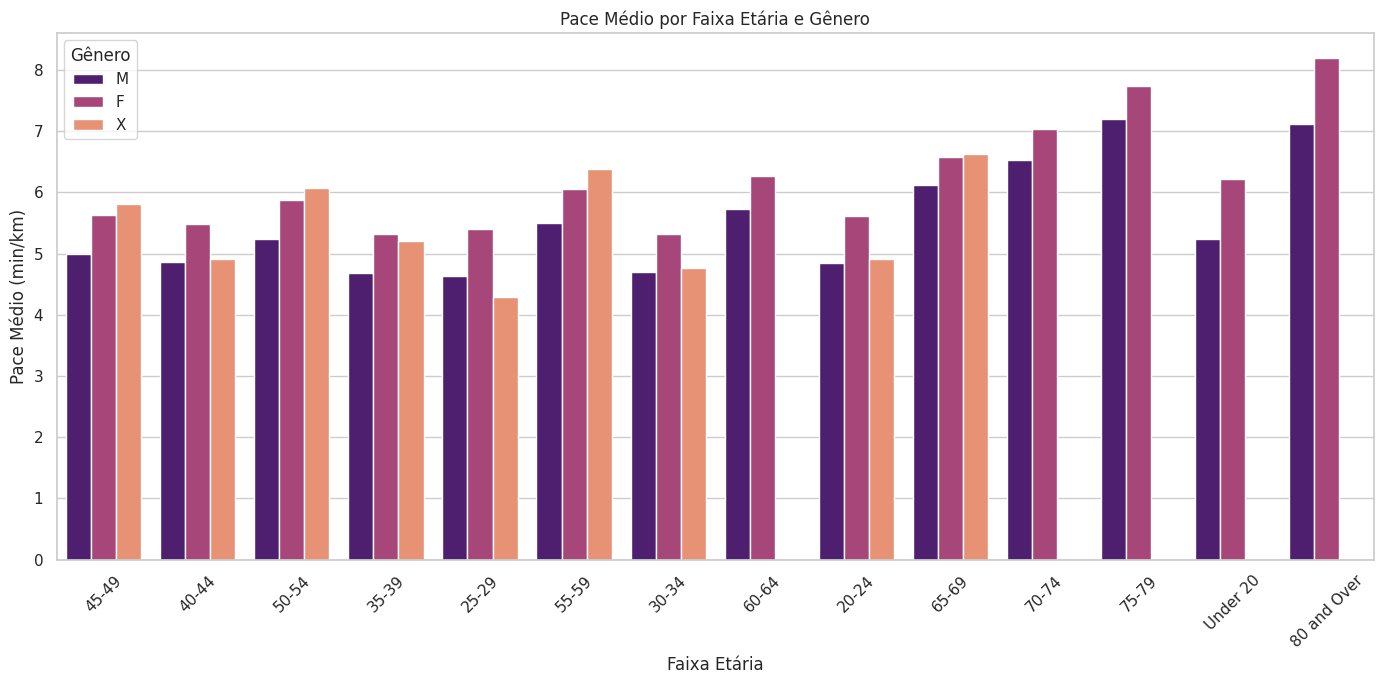

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(
    data=tabela_pace,   # nome correto do seu dataframe
    x='Age Group',
    y='avg_pace',
    hue='Gender',
    palette='magma',
    order=tabela_pace['Age Group'].unique()
)

plt.xlabel('Faixa Etária')
plt.ylabel('Pace Médio (min/km)')
plt.title('Pace Médio por Faixa Etária e Gênero')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()



# ✅Conclusão do projeto – maratona de boston 2025

##🔍 Principais insights gerados:
###**Perfil dos participantes:**

as faixas etárias com maior volume de atletas estão entre 35 e 49 anos, concentrando mais de 30% do total.

há maior presença feminina nas faixas etárias mais jovens (25–34 anos), enquanto a presença masculina aumenta nas faixas mais velhas, especialmente acima dos 50 anos.

### **Distribuição por país:**

os cinco países com maior número de participantes foram: eua, canadá, reino unido, méxico e brasil, com forte predominância norte-americana (mais de 19 mil corredores).

###**Desempenho por idade e gênero:**

os homens apresentaram, em média, paces mais baixos (mais rápidos) do que as mulheres em todas as faixas etárias.

o pace médio mais rápido foi registrado entre homens de 25 a 39 anos, reforçando essa faixa como o auge da performance física.

mulheres de 25 a 34 anos também apresentaram bons desempenhos médios, evidenciando uma geração ativa e competitiva.

### **Elite X amadores:**

os top 5 mais rápidos (masculino e feminino) registraram tempos muito abaixo da média dos corredores amadores, com paces inferiores a 3:30 min/km (fem) e 3:00 min/km (masc).

isso corresponde a velocidades entre 17 e 20 km/h, quase o dobro dos amadores, evidenciando o alto nível competitivo da elite.

##🛠️ Competências técnicas desenvolvidas:
- leitura, limpeza e manipulação de dados com pandas (tratamento de colunas, criação de variáveis, agrupamentos e merges).

- exploração visual de dados com matplotlib e seaborn (gráficos violin, boxplot, barplot e linhas de referência).

- estatísticas descritivas e interpretação de dados quantitativos (média, mediana, desvio padrão, pace e velocidade).

- uso de tempo em formato timedelta, conversões entre segundos e hh:mm:ss e cálculo de métricas derivadas como pace e velocidade.

- organização e comunicação de resultados em formato de perguntas e respostas, simulando uma entrega analítica real.

##🌱 Pontos de aperfeiçoamento futuros:

**segmentar melhor participantes amadores vs. elites:**

com dados adicionais (categoria da inscrição ou posição geral), poderia aprofundar a análise de performance por grupos de competição.

**incluir análise evolutiva:**

adicionar séries temporais para entender tendências de participação e desempenho ao longo dos anos (usar os dados de 2024).

**refinar a comunicação visual:**

explorar gráficos interativos com plotly ou dashboards com streamlit, para tornar os resultados mais dinâmicos e acessíveis a públicos não técnicos.